# Part 3 - Linear Regression

In this notebook, we will perform linear regression on a dataset we've just created in EDA. The objective is to build an appropriate linear regression model to tell that which hyperparameters are most important in helping the performance of the model.

- Stepwise regression
  
- Model evaluation 
- Model interpretation

> **Note**: this notebook uses R kernel to perform linear regression. If you don't have R kernel for Jupyter, you can just copy and paste the code into R console.

In [33]:
library(leaps)
library(car)

data <- read.csv("data/eda_data.csv")
head(data, 5)


,X,learning_rate,n_estimators,max_depth,min_child_weight,subsample,gamma,alpha,lambda,colsample_bytree,⋯,F1,learning_rate.n_estimators,learning_rate.max_depth,n_estimators.max_depth,max_depth.subsample,alpha.lambda,max_depth.min_child_weight,scale_pos.weight_max_depth,max_depth.colsample_bytree,scale_pos_weight.max_depth
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
1,0,0.11861663,915,9,5,0.9216662,0.30814537,0.6040050,0.5648192,0.9611604,⋯,0.8080999,108.53422,1.0675497,8235,8.294996,0.3411536,45,27,8.650444,27
2,1,0.28570715,549,4,1,0.9465693,0.02243028,0.8713336,0.3392034,0.9257677,⋯,0.8185859,156.85322,1.1428286,2196,3.786277,0.2955593,4,4,3.703071,4
3,2,0.22227824,553,7,5,0.6238469,0.31127350,0.9989047,0.3226837,0.7836637,⋯,0.8047893,122.91987,1.5559477,3871,4.366929,0.3223303,35,14,5.485646,14
4,3,0.18361096,728,7,2,0.8768202,0.15445886,0.6077628,0.6449063,0.7007154,⋯,0.8044808,133.66878,1.2852767,5096,6.137742,0.3919501,14,21,4.905008,21
5,4,0.05524541,320,8,5,0.6559950,0.18436258,0.4047059,0.8514844,0.7481281,⋯,0.8071021,17.67853,0.4419632,2560,5.247960,0.3446008,40,32,5.985025,32


## Stepwise Regression

The function uses forward selection to select the best variables, and then uses backward elimination to remove the least significant variables.

In [34]:
null_model <- lm(F1 ~ 1, data = data)
full_model <- lm(F1 ~ ., data = data)

fit <- step(null_model,
            scope = list(lower = null_model, upper = full_model),
            direction = "both")


Start:  AIC=-13915.43
F1 ~ 1

                             Df Sum of Sq      RSS    AIC
+ learning_rate.max_depth     1  0.049987 0.090159 -14575
+ scale_pos.weight_max_depth  1  0.041680 0.098466 -14443
+ scale_pos_weight.max_depth  1  0.041680 0.098466 -14443
+ n_estimators.max_depth      1  0.032286 0.107860 -14306
+ max_depth                   1  0.032029 0.108118 -14303
+ max_depth.colsample_bytree  1  0.028546 0.111600 -14255
+ scale_pos_weight            1  0.025633 0.114513 -14216
+ learning_rate.n_estimators  1  0.022869 0.117278 -14181
+ max_depth.subsample         1  0.018235 0.121912 -14122
+ learning_rate               1  0.016697 0.123449 -14104
+ max_depth.min_child_weight  1  0.010073 0.130074 -14025
+ n_estimators                1  0.006582 0.133565 -13986
+ subsample                   1  0.002943 0.137204 -13945
+ gamma                       1  0.001561 0.138585 -13930
+ alpha                       1  0.000448 0.139699 -13918
<none>                                    

In [35]:
summary(fit)


Call:
lm(formula = F1 ~ learning_rate.max_depth + scale_pos_weight + 
    n_estimators.max_depth + subsample + learning_rate + scale_pos.weight_max_depth + 
    max_depth + max_depth.subsample + gamma + n_estimators + 
    learning_rate.n_estimators + alpha + colsample_bytree, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0216425 -0.0029052 -0.0001517  0.0027557  0.0175433 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.482e-01  2.960e-03 286.577  < 2e-16 ***
learning_rate.max_depth    -1.348e-02  6.644e-04 -20.285  < 2e-16 ***
scale_pos_weight           -9.883e-03  3.201e-04 -30.873  < 2e-16 ***
n_estimators.max_depth     -2.529e-06  2.267e-07 -11.154  < 2e-16 ***
subsample                  -1.191e-02  3.096e-03  -3.845 0.000126 ***
learning_rate               6.240e-02  5.167e-03  12.078  < 2e-16 ***
scale_pos.weight_max_depth  9.817e-04  5.085e-05  19.305  < 2e-16 ***
max_depth

Remove alpha and colsample_bytree from the model.

In [36]:
fit <- lm(formula = F1 ~ learning_rate.max_depth + scale_pos_weight +
            n_estimators.max_depth + subsample + learning_rate +
            scale_pos_weight.max_depth + max_depth + max_depth.subsample +
            gamma + n_estimators + learning_rate.n_estimators, data = data)

summary(fit)


Call:
lm(formula = F1 ~ learning_rate.max_depth + scale_pos_weight + 
    n_estimators.max_depth + subsample + learning_rate + scale_pos_weight.max_depth + 
    max_depth + max_depth.subsample + gamma + n_estimators + 
    learning_rate.n_estimators, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0213121 -0.0029127 -0.0002222  0.0026765  0.0183220 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.470e-01  2.837e-03 298.520  < 2e-16 ***
learning_rate.max_depth    -1.350e-02  6.670e-04 -20.238  < 2e-16 ***
scale_pos_weight           -9.905e-03  3.210e-04 -30.856  < 2e-16 ***
n_estimators.max_depth     -2.540e-06  2.276e-07 -11.159  < 2e-16 ***
subsample                  -1.209e-02  3.108e-03  -3.891 0.000104 ***
learning_rate               6.266e-02  5.186e-03  12.080  < 2e-16 ***
scale_pos_weight.max_depth  9.848e-04  5.101e-05  19.305  < 2e-16 ***
max_depth                  -4.779e-0

In [37]:
vif_result <- vif(fit)

# 將VIF結果整理成data.frame
vif_df <- data.frame(
  Variable = names(vif_result),  # 變數名稱
  VIF = round(vif_result, 2)     # VIF值，保留兩位小數
)

vif_df[2]

,VIF
,<dbl>
learning_rate.max_depth,12.53
scale_pos_weight,9.91
n_estimators.max_depth,14.39
subsample,9.93
learning_rate,15.14
scale_pos_weight.max_depth,14.64
max_depth,61.19
max_depth.subsample,57.43
gamma,1.01


Removing features according to VIF.


In [38]:
fit <- lm(formula = F1 ~ learning_rate.max_depth + scale_pos_weight +
            subsample  + max_depth.subsample + gamma + n_estimators +
            learning_rate.n_estimators, data = data)

vif_result <- vif(fit)

# 將VIF結果整理成data.frame
vif_df <- data.frame(
  Variable = names(vif_result),  # 變數名稱
  VIF = round(vif_result, 2)     # VIF值，保留兩位小數
)

vif_df[2]

,VIF
,<dbl>
learning_rate.max_depth,4.60
scale_pos_weight,1.00
subsample,1.41
max_depth.subsample,2.51
gamma,1.00
n_estimators,3.07
learning_rate.n_estimators,5.71


In [39]:
summary(fit)


Call:
lm(formula = F1 ~ learning_rate.max_depth + scale_pos_weight + 
    subsample + max_depth.subsample + gamma + n_estimators + 
    learning_rate.n_estimators, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0268791 -0.0031555  0.0002673  0.0034410  0.0152459 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.237e-01  1.218e-03 676.367  < 2e-16 ***
learning_rate.max_depth    -8.875e-03  5.003e-04 -17.740  < 2e-16 ***
scale_pos_weight           -3.958e-03  1.265e-04 -31.289  < 2e-16 ***
subsample                   2.022e-02  1.448e-03  13.962  < 2e-16 ***
max_depth.subsample        -1.264e-03  1.274e-04  -9.923  < 2e-16 ***
gamma                       5.900e-03  9.785e-04   6.029 2.07e-09 ***
n_estimators               -9.522e-06  9.753e-07  -9.762  < 2e-16 ***
learning_rate.n_estimators  8.366e-06  5.132e-06   1.630    0.103    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 

Remove `learning_rate.n_estimators` since its p-value is larger than 1e-3.

In [40]:
fit <- lm(formula = F1 ~ learning_rate.max_depth + scale_pos_weight +
            subsample  + max_depth.subsample + gamma + n_estimators, data = data)

summary(fit)


Call:
lm(formula = F1 ~ learning_rate.max_depth + scale_pos_weight + 
    subsample + max_depth.subsample + gamma + n_estimators, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0268196 -0.0031028  0.0002464  0.0035081  0.0155521 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              8.230e-01  1.145e-03 718.770  < 2e-16 ***
learning_rate.max_depth -8.183e-03  2.650e-04 -30.879  < 2e-16 ***
scale_pos_weight        -3.954e-03  1.266e-04 -31.247  < 2e-16 ***
subsample                2.105e-02  1.358e-03  15.494  < 2e-16 ***
max_depth.subsample     -1.394e-03  9.931e-05 -14.039  < 2e-16 ***
gamma                    5.879e-03  9.790e-04   6.005  2.4e-09 ***
n_estimators            -8.218e-06  5.587e-07 -14.710  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005453 on 1493 degrees of freedom
Multiple R-squared:  0.6832,	Adjusted R-squared:  0.

## Model Evaluation 

Next, we will evaluate the performance of the model. First let's see how well the model fits the training data and the new testing data. We will use the mean squared error (MSE) and the coefficient of determination ($R^2$). 

In [41]:
test <- read.csv("data/testing_set.csv")

# Add interaction terms to the test data
test$learning_rate.n_estimators <- test$learning_rate * test$n_estimators
test$learning_rate.max_depth <- test$learning_rate * test$max_depth
test$n_estimators.max_depth <- test$n_estimators * test$max_depth
test$max_depth.subsample <- test$max_depth * test$subsample
test$alpha.lambda <- test$alpha * test$lambda
test$max_depth.min_child_weight <- test$max_depth * test$min_child_weight
test$scale_pos_weight.max_depth <- test$scale_pos_weight * test$max_depth
test$max_depth.colsample_bytree <- test$max_depth * test$colsample_bytree


head(test, 5)


,learning_rate,n_estimators,max_depth,min_child_weight,subsample,gamma,alpha,lambda,colsample_bytree,scale_pos_weight,F1,learning_rate.n_estimators,learning_rate.max_depth,n_estimators.max_depth,max_depth.subsample,alpha.lambda,max_depth.min_child_weight,scale_pos_weight.max_depth,max_depth.colsample_bytree
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0.13093638,616,5,4,0.6264142,0.4209490,0.02417367,0.1893696,0.6329703,3,0.8138332,80.656811,0.65468191,3080,3.132071,0.004577758,20,15,3.164852
2,0.21889410,819,3,2,0.7563092,0.3194739,0.42040201,0.4098986,0.9413152,4,0.8060458,179.274270,0.65668231,2457,2.268928,0.172322199,6,12,2.823946
3,0.01003317,131,4,4,0.7868954,0.2828157,0.32368941,0.1458626,0.9665317,4,0.7787912,1.314345,0.04013267,524,3.147582,0.047214174,16,16,3.866127
4,0.09767645,840,7,3,0.9580551,0.1535711,0.61949013,0.5623275,0.6852431,1,0.8172348,82.048215,0.68373512,5880,6.706386,0.348356349,21,7,4.796702
5,0.05255921,176,4,1,0.6442230,0.4383885,0.85976307,0.4552318,0.7894888,4,0.8052467,9.250421,0.21023683,704,2.576892,0.391391505,4,16,3.157955


Training MAE: 0.004181759 


Training R-squared: 0.6834377 


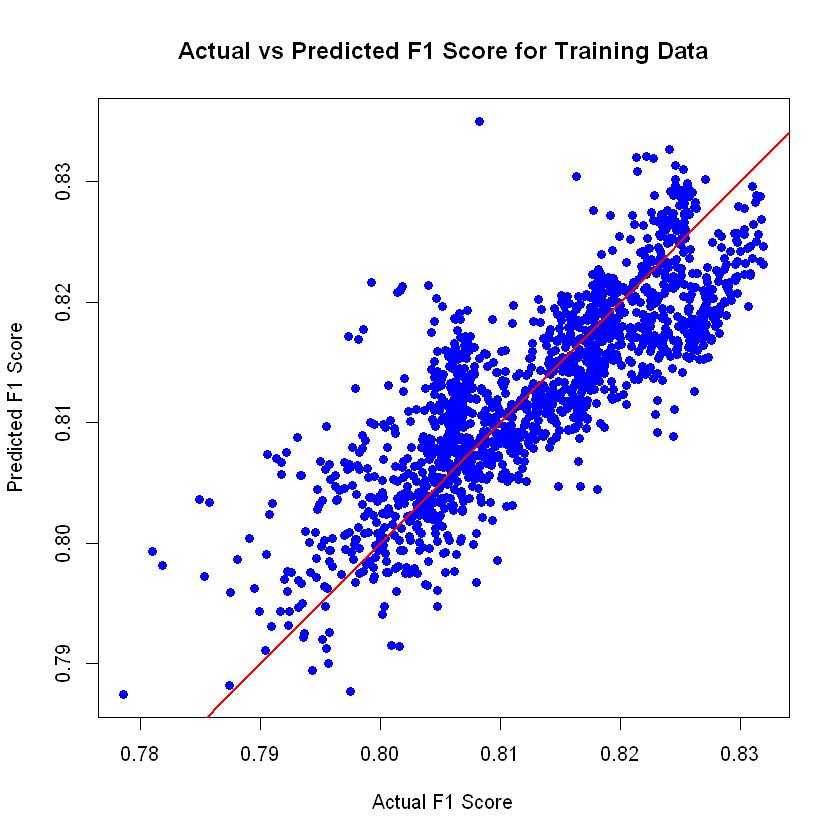

In [42]:
train_predict <- predict(fit, newdata = data)

# MSE
train_mse <- mean((train_predict - data$F1)^2)
# MAE
train_mae <- mean(abs(train_predict - data$F1))
# R-squared
train_r2 <- 1 - (train_mse / var(data$F1))

cat("Training MAE:", train_mae, "\n")
cat("Training R-squared:", train_r2, "\n")

plot(data$F1, train_predict,
     main = "Actual vs Predicted F1 Score for Training Data",
     xlab = "Actual F1 Score",
     ylab = "Predicted F1 Score",
     pch = 16, col = "blue")
abline(0, 1, col = "red", lwd = 2)


Testing MAE: 0.004114558 
Testing R-squared: 0.6662012 


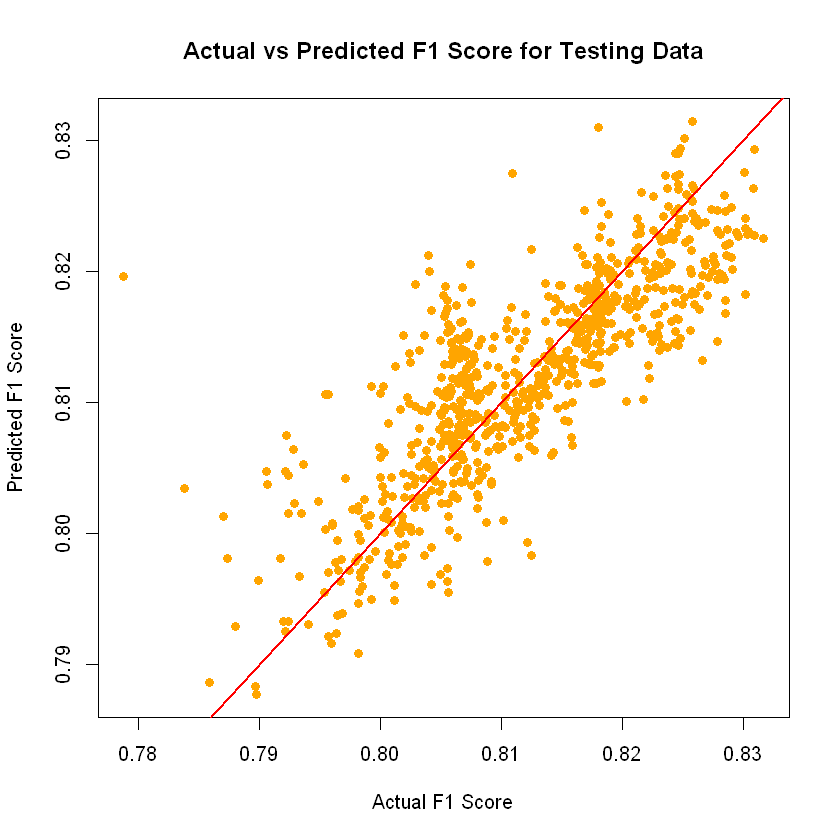

In [43]:
test_predict <- predict(fit, newdata = test)

# MSE
test_mse <- mean((test_predict - test$F1)^2)
# MAE
test_mae <- mean(abs(test_predict - test$F1))
# R-squared
test_r2 <- 1 - (test_mse / var(test$F1))

cat("Testing MAE:", test_mae, "\n")
cat("Testing R-squared:", test_r2, "\n")

plot(test$F1, test_predict,
     main = "Actual vs Predicted F1 Score for Testing Data",
     xlab = "Actual F1 Score",
     ylab = "Predicted F1 Score",
     pch = 16, col = "orange")
abline(0, 1, col = "red", lwd = 2)

### Model Assumption

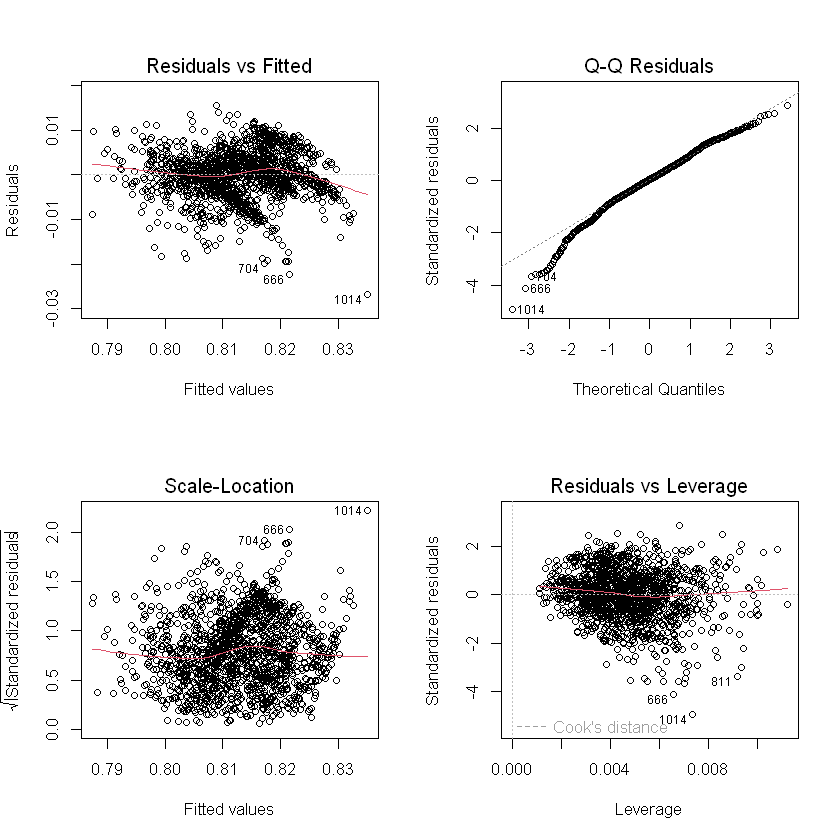

In [44]:
par(mfrow = c(2, 2))
plot(fit)

Remove outliers

In [45]:
leverage <- hatvalues(fit)
high_leverage <- which(leverage > 2 * mean(leverage))

data_clean <- data[-high_leverage, ]

fit <- lm(formula = F1 ~ learning_rate.max_depth + scale_pos_weight +
            subsample  + max_depth.subsample + gamma + n_estimators, data = data_clean)

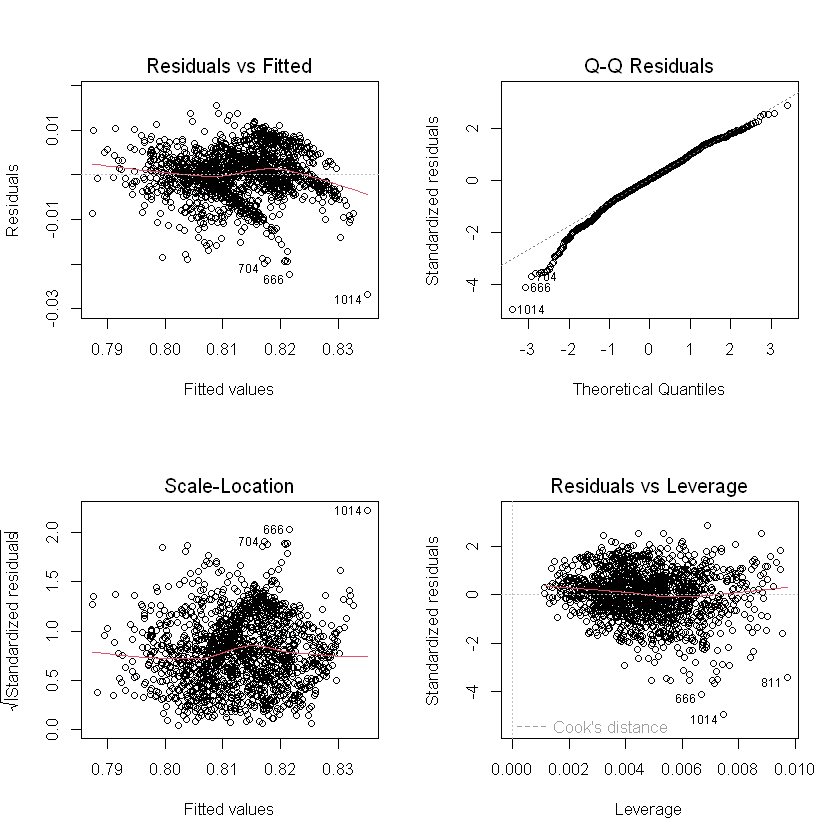

In [46]:
par(mfrow = c(2, 2))
plot(fit)